### Brazil and South Korea Exercise
In this class, after learning the basics of dataset manipulation with pandas and graph plotting with matplotlib, we were asked to reproduce 3 graphs related to the Covid-19 pandemic in Brazil and South Korea, those being:
- New cases per 100 habitants
- New cases per 1,000,000 habitants
- New cases per 100 habitants splitted

In [9]:
import pandas as pd

columns_to_keep = ['date', 'location', 'population', 'new_cases', 'new_cases_per_million']
df = pd.read_csv('data/owid_covid_data_top_10.csv', sep=',', usecols=columns_to_keep)

df['year_month'] = df['date'].str[:7]

agg = df.groupby(['location', 'year_month'], as_index=False).agg(
    new_cases=('new_cases', 'sum'),
    new_cases_per_million=('new_cases_per_million', 'sum'),
    population=('population', 'mean'),
)

agg.head()

,location,year_month,new_cases,new_cases_per_million,population
0,Brazil,2020-02,2.0,0.010,213993441.0
1,Brazil,2020-03,5715.0,26.705,213993441.0
2,Brazil,2020-04,81470.0,380.712,213993441.0
3,Brazil,2020-05,428950.0,2004.503,213993441.0
4,Brazil,2020-06,916328.0,4282.039,213993441.0


In [10]:
cases_per_habitant = agg['new_cases'] / agg['population']
agg['new_cases_per_hundred'] = cases_per_habitant * 100
# agg['new_cases_per_million'] = cases_per_habitant * 10 ** 6

br_df = agg[agg['location'] == 'Brazil']
kr_df = agg[(agg['location'] == 'South Korea') & (agg['year_month'] > '2020-01')]

br_df.head()

,location,year_month,new_cases,new_cases_per_million,population,new_cases_per_hundred
0,Brazil,2020-02,2.0,0.010,213993441.0,9.346081e-07
1,Brazil,2020-03,5715.0,26.705,213993441.0,2.670643e-03
2,Brazil,2020-04,81470.0,380.712,213993441.0,3.807126e-02
3,Brazil,2020-05,428950.0,2004.503,213993441.0,2.004501e-01
4,Brazil,2020-06,916328.0,4282.039,213993441.0,4.282038e-01


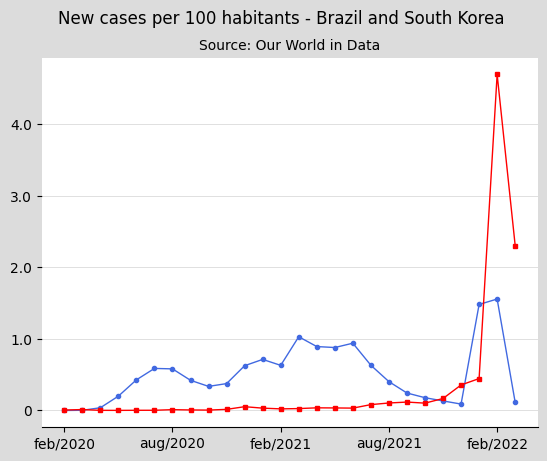

In [11]:
import matplotlib.pyplot as plt


figure, axes = plt.subplots()

x_ticks = [0, 6, 12, 18, 24]
x_labels = ['feb/2020', 'aug/2020', 'feb/2021', 'aug/2021', 'feb/2022']
y_ticks = [x for x in range(5)]
y_labels = [0] + [f'{x}.0' for x in range(1, 5)]

axes.set_xticks(x_ticks, x_labels)
axes.set_yticks(y_ticks, y_labels)

for y in y_ticks:
    axes.axhline(y=y, color='lightgray', linestyle='-', linewidth=0.5)

axes.plot(br_df['year_month'], br_df['new_cases_per_hundred'],
         color='royalblue', marker='o', linewidth=1, markersize=3)
axes.plot(kr_df['year_month'], kr_df['new_cases_per_hundred'],
         color='r', marker='s', linewidth=1, markersize=3)

for spine in ['top', 'left', 'right']:
    axes.spines[spine].set_visible(False)

plt.suptitle('New cases per 100 habitants - Brazil and South Korea')
plt.title('Source: Our World in Data', fontsize=10)

figure.set_facecolor('gainsboro')

plt.show()

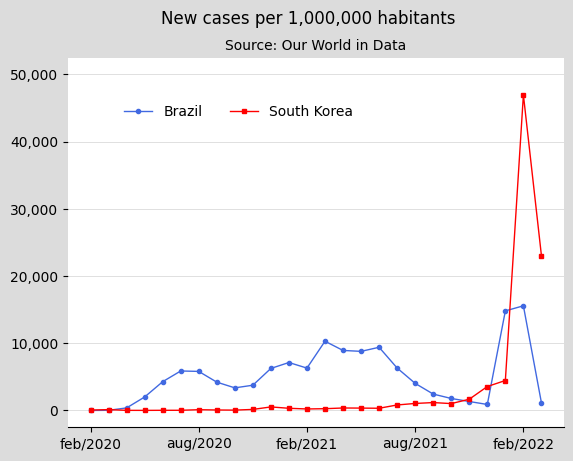

In [12]:
import matplotlib.pyplot as plt


figure, axes = plt.subplots()

x_ticks = [0, 6, 12, 18, 24]
x_labels = ['feb/2020', 'aug/2020', 'feb/2021', 'aug/2021', 'feb/2022']
y_ticks = [x * 10 ** 4 for x in range(6)]
y_labels = [0] + [f'{x}0,000' for x in range(1, 6)]

axes.set_xticks(x_ticks, x_labels)
axes.set_yticks(y_ticks, y_labels)

for y in y_ticks:
    axes.axhline(y=y, color='lightgray', linestyle='-', linewidth=0.5)

axes.plot(br_df['year_month'], br_df['new_cases_per_million'],
         color='royalblue', label='Brazil', marker='o', linewidth=1, markersize=3)
axes.plot(kr_df['year_month'], kr_df['new_cases_per_million'],
         color='r', label='South Korea', marker='s', linewidth=1, markersize=3)

for spine in ['top', 'left', 'right']:
    axes.spines[spine].set_visible(False)

plt.suptitle('New cases per 1,000,000 habitants')
plt.title('Source: Our World in Data', fontsize=10)

figure.set_facecolor('gainsboro')

plt.legend(frameon=False, ncols=2, bbox_to_anchor=(0.6, 0.8))
plt.show()

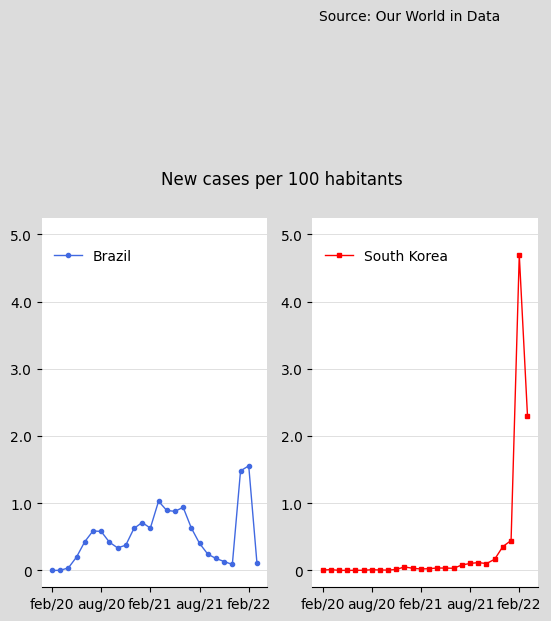

In [13]:
figure, axes = plt.subplots(1, 2)

x_ticks = [0, 6, 12, 18, 24]
x_labels = ['feb/20', 'aug/20', 'feb/21', 'aug/21', 'feb/22']
y_ticks = [x for x in range(6)]
y_labels = [0] + [f'{x}.0' for x in range(1, 6)]

for i in range(2):
    for y in y_ticks:
        axes[i].axhline(y=y, color='lightgray', linestyle='-', linewidth=0.5)
    
    axes[i].set_xticks(x_ticks, x_labels)
    axes[i].set_yticks(y_ticks, y_labels)
    
    for spine in ['top', 'left', 'right']:
        axes[i].spines[spine].set_visible(False)


axes[0].plot(br_df['year_month'], br_df['new_cases_per_hundred'],
             color='royalblue', label='Brazil', marker='o', linewidth=1, markersize=3)
axes[1].plot(kr_df['year_month'], kr_df['new_cases_per_hundred'],
             color='r', label='South Korea', marker='s', linewidth=1, markersize=3)


for i in range(2):
    axes[i].legend(loc='upper left', bbox_to_anchor=(0, 0.95), frameon=False)

figure.set_facecolor('gainsboro')
figure.suptitle('New cases per 100 habitants')
figure.text(0.7, 1.3, 'Source: Our World in Data', ha='center', va='center')

plt.show()